In [57]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon, friedmanchisquare, rankdata
from Orange.evaluation import compute_CD, graph_ranks 

CaminhoArquivo = 'C:/Users/John/Desktop/Mestrado/Dissertacao/ProjetoBikes/Experimentos/ResultadosClassificacaoCidade.csv'

resultados = pd.read_csv(CaminhoArquivo, sep=';');
resultados.head(10)

,Base,SVC,NB,KNN,MLP,RFC,DT
0,Base 3,56.38,60.94,52.91,54.80,65.44,75.08
1,Base 4,36.47,44.63,35.07,41.13,60.14,70.65
2,Base 5,66.32,60.94,46.48,71.88,65.90,74.63
3,Base 6,50.55,44.63,34.87,66.92,60.74,70.77
4,Base 7,65.51,63.31,45.95,73.69,61.55,62.97
5,Base 8,63.35,62.90,47.87,61.79,50.79,51.31
6,Base 9,49.68,44.27,34.42,33.51,51.37,53.49
7,Base 10,45.63,45.00,31.79,47.23,35.20,34.79


In [58]:
# Extrai o nome dos algoritmos.
algoritmos_nomes = resultados.drop('Base', axis=1).columns

In [59]:
# Extrai as acurácias em um numpy.ndarray.
resultados_array = resultados[algoritmos_nomes].values

In [60]:
# Aplica o Friedman test.
friedmanchisquare(*resultados_array)

FriedmanchisquareResult(statistic=26.187250996015916, pvalue=0.00046629871439958975)

In [61]:
ranks = np.array([rankdata(-p) for p in resultados_array])

In [62]:
# Calculating the average ranks.
average_ranks = np.mean(ranks, axis=0)

In [63]:
print('\n'.join('{} average rank: {}'.format(a, r) for a, r in zip(algoritmos_nomes, average_ranks)))

SVC average rank: 3.0
NB average rank: 3.5
KNN average rank: 5.875
MLP average rank: 3.0
RFC average rank: 3.375
DT average rank: 2.25


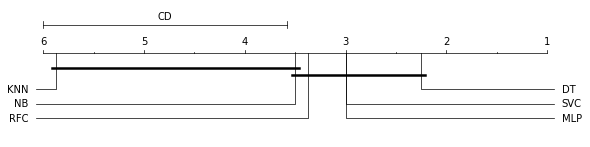

<Figure size 432x288 with 0 Axes>

In [94]:
# This method computes the critical difference for Nemenyi test with alpha=0.1. # For some reason, this method only accepts alpha='0.05' or alpha='0.1'.
cd = compute_CD(average_ranks, n=len(resultados), alpha='0.1', test='nemenyi')
# This method generates the plot.
graph_ranks(average_ranks, names=algoritmos_nomes, cd=cd, width=8, textspace=0.5, reverse=True)
salvar='C:/Users/John/Desktop/Mestrado/Dissertacao/ProjetoBikes/Experimentos/ResultadosClassificacaoCidade'
plt.savefig(salvar, bbox_inches='tight')
plt.figure(0).clear()

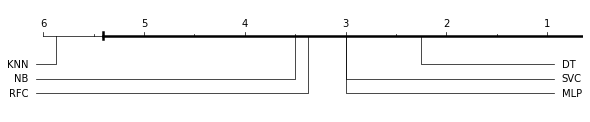

In [95]:
cd = compute_CD(average_ranks, n=len(resultados), alpha='0.05', test='bonferroni-dunn')
graph_ranks(average_ranks, names=algoritmos_nomes, cd=cd, cdmethod=0, width=8, textspace=0.5, reverse=True)
plt.show()